<a href="https://colab.research.google.com/github/anumfatima427/anumfatima427/blob/main/Image%20Visualization%2Cnormalization%2Cregistration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install simpleitk
!pip install nipype # for preprocessing
!pip install pyradiomics # required package for extracting radiomics features


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52.8 MB 147 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 5.0 MB/s 
     |████████████████████████████████| 5.1 MB 44.3 MB/s 
     |████████████████████████████████| 500 kB 70.0 MB/s 
     |████████████████████████████████| 130 kB 67.4 MB/s 
     |████████████████████████████████| 421 kB 52.5 MB/s 
     |████████████████████████████████| 41 kB 549 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 188 kB 4.2 MB/s 
     |████████████████████████████████| 109 kB 8.5 MB/s 
     |████████████████████████████████| 500 kB 8.4 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=ed6f96397a83acca31cb1b53d312e5195ea85248

Feature Scaling



In [ ]:
import SimpleITK as sitk # important package for medical imaging

img1 = sitk.ReadImage('/content/drive/MyDrive/FAST/NFBS Dataset/NFBS_Dataset/A00028185/sub-A00028185_ses-NFB3_T1w.nii.gz')


(0.01, 700.0, 0.0, 20000.0)

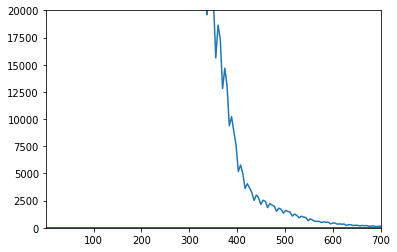

In [ ]:
from skimage.exposure import histogram
from skimage import exposure, util
import matplotlib.pyplot as plt

#just to plot the histogram and have a look at the intensity values
img1_array = sitk.GetArrayFromImage(img1)
hist1, hist_centers1 = histogram(img1_array,nbins=256)
img_cdf1, bins1 = exposure.cumulative_distribution(img1_array)
plt.plot(bins1, img_cdf1, 'r')
plt.plot(hist_centers1, hist1)
plt.axis([0.01, 700, 0, 2e4])
#plt.axis([0.01, 300, 0, 1e5])


In [ ]:
#rescale image

def rescale_image(image):
  filter = sitk.RescaleIntensityImageFilter()
  filter.SetOutputMaximum(255)
  filter.SetOutputMinimum(0)
  rescaled_img = filter.Execute(image)
  return rescaled_img

(0.01, 300.0, 0.0, 100000.0)

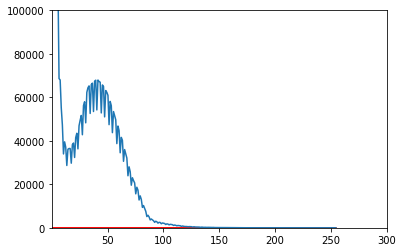

In [ ]:

fig, (ax1) = plt.subplots(1)
rescaled_img1 = rescale_image(img1)
#rescaled image array
rescaled_img1_array = sitk.GetArrayFromImage(rescaled_img1)
hist1, hist_centers1 = histogram(rescaled_img1_array,nbins=256)
img_cdf1, bins1 = exposure.cumulative_distribution(rescaled_img1_array)

ax1.plot(bins1, img_cdf1, 'r')
ax1.plot(hist_centers1, hist1)

ax1.axis([0.01, 300, 0, 1e5])




**Normalization**

*   **Mean Normalization** - Guarantees all features will have the exact same scale but does not handle outliers well.
*   MinMax Normalization
*   **Z-score Normalization** -  Handles outliers, but does not produce normalized data with the exact same scale.
  *   Standard Deviation
  *   List item







In [ ]:
import numpy as np

#mean normalization

def mean_normalization(image):
  image = sitk.GetArrayFromImage(image)
  mask = np.where(image != 0)
  desired_img = image[mask]
  mean = np.mean(desired_img)
  std = np.std(desired_img)
  final_image = (image - mean)/ std
  final_image = sitk.GetImageFromArray(final_image)
  return final_image
  

In [ ]:
def max_min_normalization(image):
  image = sitk.GetArrayFromImage(image)
  max = np.max(image)
  min = np.min(image)
  final_image = (image - min)/ (max - min)
  final_image = sitk.GetImageFromArray(final_image)
  return final_image

**Z-score Normalization**

The [z-score method](https://datagy.io/python-z-score/) (often called standardization) transforms the data into a distribution with a mean of 0 and a standard deviation of 1.

The z-score is generally calculated for each value in a given feature. It takes into account the standard deviation and the mean of the feature. The formula for the z-score looks like this:

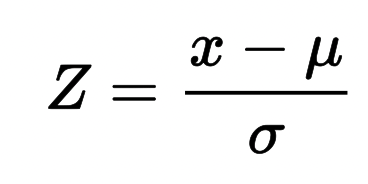

In [ ]:
from sklearn.preprocessing import StandardScaler

def zscore_normalization(image):

  image = sitk.GetArrayFromImage(image)
  mask = np.where(image != 0)
  desired_img = image[mask]
  mean = np.mean(desired_img)
  differences = [(value - mean)**2 for value in image]
  std = np.std(desired_img)
  print(std)

  #calculate z-score
  zscores = [(value - mean) / std for value in image]
  print(zscores)

  final_image = sitk.GetImageFromArray(zscores)
  return final_image

In [ ]:

#mm_normalized_image = max_min_normalization(rescaled_img1)
#m_normalized_image = mean_normalization(rescaled_img1)
zscore_normalized_image = zscore_normalization(rescaled_img1)

24.09685
[array([[-0.7328657 , -0.7328657 , -0.7328657 , ..., -0.7328657 ,
        -0.7328657 , -0.7328657 ],
       [-0.7328657 , -0.7328657 , -0.7328657 , ..., -0.72408366,
        -0.70651966, -0.7153017 ],
       [-0.7328657 , -0.7328657 , -0.7328657 , ..., -0.7328657 ,
        -0.70651966, -0.7153017 ],
       ...,
       [-0.7328657 , -0.7328657 , -0.7328657 , ..., -0.6450458 ,
        -0.6186998 , -0.58357185],
       [-0.7328657 , -0.7328657 , -0.7328657 , ..., -0.6362638 ,
        -0.6889557 , -0.66260976],
       [-0.7328657 , -0.7328657 , -0.7328657 , ..., -0.68017375,
        -0.6186998 , -0.6538278 ]], dtype=float32), array([[-0.7328657 , -0.7328657 , -0.7328657 , ..., -0.7328657 ,
        -0.7328657 , -0.7328657 ],
       [-0.7328657 , -0.7328657 , -0.7328657 , ..., -0.7153017 ,
        -0.7328657 , -0.72408366],
       [-0.7328657 , -0.7328657 , -0.7328657 , ..., -0.72408366,
        -0.7328657 , -0.7153017 ],
       ...,
       [-0.7328657 , -0.7328657 , -0.7328657 , ..

(-3.0, 5.0, 0.0, 20000.0)

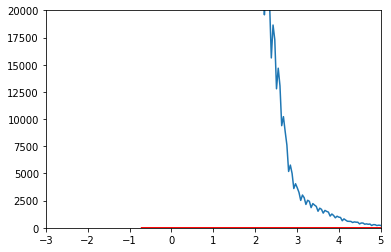

In [ ]:
fig, (ax1) = plt.subplots(1)
zscore_array = sitk.GetArrayFromImage(zscore_normalized_image)
hist1, hist_centers1 = histogram(zscore_array,nbins=256)
img_cdf1, bins1 = exposure.cumulative_distribution(zscore_array)
ax1.plot(bins1, img_cdf1, 'r')
ax1.plot(hist_centers1, hist1)
ax1.axis([-3, 5, 0, 2e4])


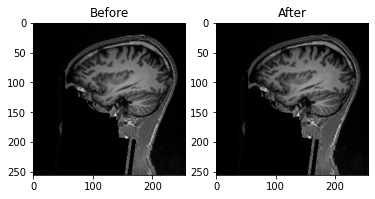

In [ ]:
fig, (ax1 , ax2) = plt.subplots(1, 2)
ax1.set_title('Before')
ax2.set_title('After')
ax1.imshow(sitk.GetArrayViewFromImage(img1)[64,:,:], cmap='gray')
ax2.imshow(sitk.GetArrayViewFromImage(zscore_normalized_image)[64,:,:], cmap='gray')


In [ ]:
#Bias Correction
#N4BiasFieldCorrectionImageFilter


def n4_bias_correction(image):
  img_mask = sitk.OtsuThreshold(image)
  image = sitk.Cast(image,sitk.sitkFloat32)
  corrector = sitk.N4BiasFieldCorrectionImageFilter()
  output_corrected = corrector.Execute(image,img_mask)
  return output_corrected

In [ ]:
bias_corrected_img = n4_bias_correction(zscore_normalized_image)


bias correction for one image takes upto 10 min, (find a better way to bias correct images faster!)

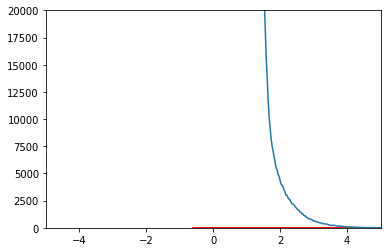

In [ ]:
bias_corrected_img_array = sitk.GetArrayFromImage(bias_corrected_img)
hist, hist_centers = histogram(bias_corrected_img_array,nbins=256)
img_cdf, bins = exposure.cumulative_distribution(bias_corrected_img_array)
plt.plot(bins, img_cdf, 'r')
plt.plot(hist_centers, hist)
plt.axis([-5, 5, 0, 2e4])
plt.show()

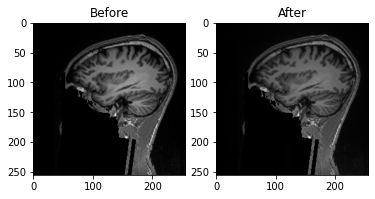

In [ ]:
fig, (ax1 , ax2) = plt.subplots(1, 2)
ax1.set_title('Before')
ax2.set_title('After')
ax1.imshow(sitk.GetArrayViewFromImage(img1)[64,:,:], cmap='gray')
ax2.imshow(sitk.GetArrayViewFromImage(bias_corrected_img)[64,:,:], cmap='gray')



# **Image Registration**

[Helpful Link](https://github.com/InsightSoftwareConsortium/SimpleITK-Notebooks/blob/master/Python/60_Registration_Introduction.ipynb)

In [ ]:
!pip install PySimpleGUI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 509 kB 4.9 MB/s 


In [2]:
import SimpleITK as sitk

# Utility method that either downloads data from the Girder repository or
# if already downloaded returns the file name for reading from disk (cached data).
#%run update_path_to_download_script
#from downloaddata import fetch_data as fdata

# Always write output to a separate directory, we don't want to pollute the source directory. 
import os
OUTPUT_DIR = '/content/drive/MyDrive/FAST/NFBS Dataset/Registered Image'

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed
from IPython.display import clear_output

# Callback invoked by the interact IPython method for scrolling through the image stacks of
# the two images (moving and fixed).
def display_images(fixed_image_z, moving_image_z, fixed_npa, moving_npa):
    # Create a figure with two subplots and the specified size.
    plt.subplots(1,2,figsize=(10,8))
    
    # Draw the fixed image in the first subplot.
    plt.subplot(1,2,1)
    plt.imshow(fixed_npa[fixed_image_z,:,:],cmap=plt.cm.Greys_r);
    plt.title('fixed image')
    plt.axis('off')
    
    # Draw the moving image in the second subplot.
    plt.subplot(1,2,2)
    plt.imshow(moving_npa[moving_image_z,:,:],cmap=plt.cm.Greys_r);
    plt.title('moving image')
    plt.axis('off')
    
    plt.show()

# Callback invoked by the IPython interact method for scrolling and modifying the alpha blending
# of an image stack of two images that occupy the same physical space. 
def display_images_with_alpha(image_z, alpha, fixed, moving):
    img = (1.0 - alpha)*fixed[:,:,image_z] + alpha*moving[:,:,image_z] 
    plt.imshow(sitk.GetArrayViewFromImage(img),cmap=plt.cm.Greys_r);
    plt.axis('off')
    plt.show()
    
# Callback invoked when the StartEvent happens, sets up our new data.
def start_plot():
    global metric_values, multires_iterations
    
    metric_values = []
    multires_iterations = []

# Callback invoked when the EndEvent happens, do cleanup of data and figure.
def end_plot():
    global metric_values, multires_iterations
    
    del metric_values
    del multires_iterations
    # Close figure, we don't want to get a duplicate of the plot latter on.
    plt.close()

# Callback invoked when the IterationEvent happens, update our data and display new figure.
def plot_values(registration_method):
    global metric_values, multires_iterations
    
    metric_values.append(registration_method.GetMetricValue())                                       
    # Clear the output area (wait=True, to reduce flickering), and plot current data
    clear_output(wait=True)
    # Plot the similarity metric values
    plt.plot(metric_values, 'r')
    plt.plot(multires_iterations, [metric_values[index] for index in multires_iterations], 'b*')
    plt.xlabel('Iteration Number',fontsize=12)
    plt.ylabel('Metric Value',fontsize=12)
    plt.show()
    
# Callback invoked when the sitkMultiResolutionIterationEvent happens, update the index into the 
# metric_values list. 
def update_multires_iterations():
    global metric_values, multires_iterations
    multires_iterations.append(len(metric_values))
   

In [4]:
fixed_image =  sitk.ReadImage('/content/training_001_ct.mha', sitk.sitkFloat32) 
moving_image = sitk.ReadImage('/content/training_001_mr_T1.mha', sitk.sitkFloat32) 
 
interact(display_images, fixed_image_z=(0,fixed_image.GetSize()[2]-1), moving_image_z=(0,moving_image.GetSize()[2]-1), fixed_npa = fixed(sitk.GetArrayViewFromImage(fixed_image)), moving_npa=fixed(sitk.GetArrayViewFromImage(moving_image)));

interactive(children=(IntSlider(value=14, description='fixed_image_z', max=28), IntSlider(value=12, descriptio…

In [5]:
initial_transform = sitk.CenteredTransformInitializer(fixed_image, 
                                                      moving_image, 
                                                      sitk.Euler3DTransform(), 
                                                      sitk.CenteredTransformInitializerFilter.GEOMETRY)

moving_resampled = sitk.Resample(moving_image, fixed_image, initial_transform, sitk.sitkLinear, 0.0, moving_image.GetPixelID())

interact(display_images_with_alpha, image_z=(0,fixed_image.GetSize()[2]-1), alpha=(0.0,1.0,0.05), fixed = fixed(fixed_image), moving=fixed(moving_resampled));


interactive(children=(IntSlider(value=14, description='image_z', max=28), FloatSlider(value=0.5, description='…

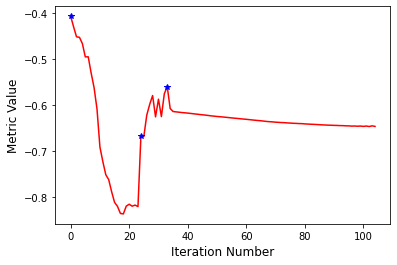

In [6]:

registration_method = sitk.ImageRegistrationMethod()

# Similarity metric settings.
registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
registration_method.SetMetricSamplingPercentage(0.01)

registration_method.SetInterpolator(sitk.sitkLinear)

# Optimizer settings.
registration_method.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=100, convergenceMinimumValue=1e-6, convergenceWindowSize=10)
registration_method.SetOptimizerScalesFromPhysicalShift()

# Setup for the multi-resolution framework.            
registration_method.SetShrinkFactorsPerLevel(shrinkFactors = [4,2,1])
registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[2,1,0])
registration_method.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()

# Don't optimize in-place, we would possibly like to run this cell multiple times.
registration_method.SetInitialTransform(initial_transform, inPlace=False)

# Connect all of the observers so that we can perform plotting during registration.
registration_method.AddCommand(sitk.sitkStartEvent, start_plot)
registration_method.AddCommand(sitk.sitkEndEvent, end_plot)
registration_method.AddCommand(sitk.sitkMultiResolutionIterationEvent, update_multires_iterations) 
registration_method.AddCommand(sitk.sitkIterationEvent, lambda: plot_values(registration_method))

final_transform = registration_method.Execute(sitk.Cast(fixed_image, sitk.sitkFloat32), 
                                               sitk.Cast(moving_image, sitk.sitkFloat32))

In [8]:
print('Final metric value: {0}'.format(registration_method.GetMetricValue()))
print('Optimizer\'s stopping condition, {0}'.format(registration_method.GetOptimizerStopConditionDescription()))

Final metric value: -0.6432622339446868
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 72.


In [9]:
moving_resampled = sitk.Resample(moving_image, fixed_image, final_transform, sitk.sitkLinear, 0.0, moving_image.GetPixelID())

interact(display_images_with_alpha, image_z=(0,fixed_image.GetSize()[2] - 1), alpha=(0.0,1.0,0.05), fixed = fixed(fixed_image), moving=fixed(moving_resampled));

interactive(children=(IntSlider(value=14, description='image_z', max=28), FloatSlider(value=0.5, description='…

In [10]:
sitk.WriteImage(moving_resampled, os.path.join(OUTPUT_DIR, 'RIRE_training_001_mr_T1_resampled.mha'))
sitk.WriteTransform(final_transform, os.path.join(OUTPUT_DIR, 'RIRE_training_001_CT_2_mr_T1.tfm'))

**[Basic Registration](https://simpleitk.org/SPIE2019_COURSE/04_basic_registration.html)**


In [ ]:
! git clone https://github.com/InsightSoftwareConsortium/SimpleITK-Notebooks

fatal: destination path 'SimpleITK-Notebooks' already exists and is not an empty directory.


In [ ]:
! git pull

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
%cd /content/SimpleITK-Notebooks
! git pull

/content/SimpleITK-Notebooks
Already up to date.


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed
from IPython.display import clear_output

# Callback invoked by the interact IPython method for scrolling through the image stacks of
# the two images (moving and fixed).
def display_images(fixed_image_z, moving_image_z, fixed_npa, moving_npa):
    # Create a figure with two subplots and the specified size.
    plt.subplots(1, 2, figsize=(10, 8))

    # Draw the fixed image in the first subplot.
    plt.subplot(1, 2, 1)
    plt.imshow(fixed_npa[fixed_image_z, :, :], cmap=plt.cm.Greys_r)
    plt.title("Full MRI image")
    plt.axis("off")

    # Draw the moving image in the second subplot.
    plt.subplot(1, 2, 2)
    plt.imshow(moving_npa[moving_image_z, :, :], cmap=plt.cm.Greys_r)
    plt.title("Brain image")
    plt.axis("off")

    plt.show()


# Callback invoked by the IPython interact method for scrolling and modifying the alpha blending
# of an image stack of two images that occupy the same physical space.
def display_images_with_alpha(image_z, alpha, fixed, moving):
    img = (1.0 - alpha) * fixed[:, :, image_z] + alpha * moving[:, :, image_z]
    plt.imshow(sitk.GetArrayViewFromImage(img), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.show()


# Callback invoked when the StartEvent happens, sets up our new data.
def start_plot():
    global metric_values, multires_iterations

    metric_values = []
    multires_iterations = []


# Callback invoked when the EndEvent happens, do cleanup of data and figure.
def end_plot():
    global metric_values, multires_iterations

    del metric_values
    del multires_iterations
    # Close figure, we don't want to get a duplicate of the plot latter on.
    plt.close()


# Callback invoked when the IterationEvent happens, update our data and display new figure.
def plot_values(registration_method):
    global metric_values, multires_iterations

    metric_values.append(registration_method.GetMetricValue())
    # Clear the output area (wait=True, to reduce flickering), and plot current data
    clear_output(wait=True)
    # Plot the similarity metric values
    plt.plot(metric_values, "r")
    plt.plot(
        multires_iterations,
        [metric_values[index] for index in multires_iterations],
        "b*",
    )
    plt.xlabel("Iteration Number", fontsize=12)
    plt.ylabel("Metric Value", fontsize=12)
    plt.show()


# Callback invoked when the sitkMultiResolutionIterationEvent happens, update the index into the
# metric_values list.
def update_multires_iterations():
    global metric_values, multires_iterations
    multires_iterations.append(len(metric_values))

In [12]:
#registration_gui

import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

#
# Set of methods used for displaying the registration metric during the optimization.
#

# Callback invoked when the StartEvent happens, sets up our new data.
def start_plot():
    global metric_values, multires_iterations, ax, fig
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    metric_values = []
    multires_iterations = []
    plt.show()


# Callback invoked when the EndEvent happens, do cleanup of data and figure.
def end_plot():
    global metric_values, multires_iterations, ax, fig

    del metric_values
    del multires_iterations
    del ax
    del fig


# Callback invoked when the IterationEvent happens, update our data and display new figure.
def plot_values(registration_method):
    global metric_values, multires_iterations, ax, fig

    metric_values.append(registration_method.GetMetricValue())
    # Plot the similarity metric values
    ax.plot(metric_values, "r")
    ax.plot(
        multires_iterations,
        [metric_values[index] for index in multires_iterations],
        "b*",
    )
    ax.set_xlabel("Iteration Number", fontsize=12)
    ax.set_ylabel("Metric Value", fontsize=12)
    fig.canvas.draw()


# Callback invoked when the sitkMultiResolutionIterationEvent happens, update the index into the
# metric_values list.
def update_multires_iterations():
    global metric_values, multires_iterations
    multires_iterations.append(len(metric_values))


def overlay_binary_segmentation_contours(image, mask, window_min, window_max):
    """
    Given a 2D image and mask:
       a. resample the image and mask into isotropic grid (required for display).
       b. rescale the image intensities using the given window information.
       c. overlay the contours computed from the mask onto the image.
    """
    # Resample the image (linear interpolation) and mask (nearest neighbor interpolation) into an isotropic grid,
    # required for display.
    original_spacing = image.GetSpacing()
    original_size = image.GetSize()
    min_spacing = min(original_spacing)
    new_spacing = [min_spacing, min_spacing]
    new_size = [
        int(round(original_size[0] * (original_spacing[0] / min_spacing))),
        int(round(original_size[1] * (original_spacing[1] / min_spacing))),
    ]
    resampled_img = sitk.Resample(
        image,
        new_size,
        sitk.Transform(),
        sitk.sitkLinear,
        image.GetOrigin(),
        new_spacing,
        image.GetDirection(),
        0.0,
        image.GetPixelID(),
    )
    resampled_msk = sitk.Resample(
        mask,
        new_size,
        sitk.Transform(),
        sitk.sitkNearestNeighbor,
        mask.GetOrigin(),
        new_spacing,
        mask.GetDirection(),
        0.0,
        mask.GetPixelID(),
    )

    # Create the overlay: cast the mask to expected label pixel type, and do the same for the image after
    # window-level, accounting for the high dynamic range of the CT.
    return sitk.LabelMapContourOverlay(
        sitk.Cast(resampled_msk, sitk.sitkLabelUInt8),
        sitk.Cast(
            sitk.IntensityWindowing(
                resampled_img, windowMinimum=window_min, windowMaximum=window_max
            ),
            sitk.sitkUInt8,
        ),
        opacity=1,
        contourThickness=[2, 2],
    )


def display_coronal_with_overlay(
    temporal_slice, coronal_slice, images, masks, label, window_min, window_max
):
    """
    Display a coronal slice from the 4D (3D+time) CT with a contour overlaid onto it. The contour is the edge of
    the specific label.
    """
    img = images[temporal_slice][:, coronal_slice, :]
    msk = masks[temporal_slice][:, coronal_slice, :] == label

    overlay_img = overlay_binary_segmentation_contours(img, msk, window_min, window_max)
    # Flip the image so that corresponds to correct radiological view.
    plt.imshow(np.flipud(sitk.GetArrayFromImage(overlay_img)))
    plt.axis("off")
    plt.show()


def display_coronal_with_label_maps_overlay(
    coronal_slice, mask_index, image, masks, label, window_min, window_max
):
    """
    Display a coronal slice from a 3D CT with a contour overlaid onto it. The contour is the edge of
    the specific label from the specific mask. Function is used to display results of transforming a segmentation
    using registration.
    """
    img = image[:, coronal_slice, :]
    msk = masks[mask_index][:, coronal_slice, :] == label

    overlay_img = overlay_binary_segmentation_contours(img, msk, window_min, window_max)
    # Flip the image so that corresponds to correct radiological view.
    plt.imshow(np.flipud(sitk.GetArrayFromImage(overlay_img)))
    plt.axis("off")
    plt.show()


In [13]:
#gui


import SimpleITK as sitk
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from matplotlib.widgets import RectangleSelector
import matplotlib.patches as patches
import matplotlib.cm as cm
from matplotlib.ticker import MaxNLocator
import copy


class RegistrationPointDataAquisition(object):
    """
    This class provides a GUI for localizing corresponding points in two images, and for evaluating registration results using a linked cursor
    approach, user clicks in one image and the corresponding point is added to the other image.
    """

    def __init__(
        self,
        fixed_image,
        moving_image,
        fixed_window_level=None,
        moving_window_level=None,
        figure_size=(10, 8),
        known_transformation=None,
    ):
        self.fixed_image = fixed_image
        (
            self.fixed_npa,
            self.fixed_min_intensity,
            self.fixed_max_intensity,
        ) = self.get_window_level_numpy_array(self.fixed_image, fixed_window_level)
        self.moving_image = moving_image
        (
            self.moving_npa,
            self.moving_min_intensity,
            self.moving_max_intensity,
        ) = self.get_window_level_numpy_array(self.moving_image, moving_window_level)
        self.fixed_point_indexes = []
        self.moving_point_indexes = []
        self.click_history = (
            []
        )  # Keep a history of user point localizations, enabling undo of last localization.
        self.known_transformation = known_transformation  # If the transformation is valid (not None) then corresponding points are automatically added.
        self.text_and_marker_color = "red"

        ui = self.create_ui()
        display(ui)

        # Create a figure with two axes for the fixed and moving images.
        self.fig, axes = plt.subplots(1, 2, figsize=figure_size)
        # self.fig.canvas.set_window_title('Registration Points Acquisition')
        self.fixed_axes = axes[0]
        self.moving_axes = axes[1]
        # Connect the mouse button press to the canvas (__call__ method is the invoked callback).
        self.fig.canvas.mpl_connect("button_press_event", self)

        # Display the data and the controls, first time we display the images is outside the "update_display" method
        # as that method relies on the previous zoom factor which doesn't exist yet.
        self.fixed_axes.imshow(
            self.fixed_npa[self.fixed_slider.value, :, :]
            if self.fixed_slider
            else self.fixed_npa,
            cmap=plt.cm.Greys_r,
            vmin=self.fixed_min_intensity,
            vmax=self.fixed_max_intensity,
        )
        self.moving_axes.imshow(
            self.moving_npa[self.moving_slider.value, :, :]
            if self.moving_slider
            else self.moving_npa,
            cmap=plt.cm.Greys_r,
            vmin=self.moving_min_intensity,
            vmax=self.moving_max_intensity,
        )
        self.update_display()

    def create_ui(self):
        # Create the active UI components. Height and width are specified in 'em' units. This is
        # a html size specification, size relative to current font size.
        self.viewing_checkbox = widgets.RadioButtons(
            description="Interaction mode:", options=["edit", "view"], value="edit"
        )

        self.clearlast_button = widgets.Button(
            description="Clear Last", width="7em", height="3em"
        )
        self.clearlast_button.on_click(self.clear_last)

        self.clearall_button = widgets.Button(
            description="Clear All", width="7em", height="3em"
        )
        self.clearall_button.on_click(self.clear_all)

        # Sliders are only created if a 3D image, otherwise no need.
        self.fixed_slider = self.moving_slider = None
        if self.fixed_npa.ndim == 3:
            self.fixed_slider = widgets.IntSlider(
                description="fixed image z slice:",
                min=0,
                max=self.fixed_npa.shape[0] - 1,
                step=1,
                value=int((self.fixed_npa.shape[0] - 1) / 2),
                width="20em",
            )
            self.fixed_slider.observe(self.on_slice_slider_value_change, names="value")

            self.moving_slider = widgets.IntSlider(
                description="moving image z slice:",
                min=0,
                max=self.moving_npa.shape[0] - 1,
                step=1,
                value=int((self.moving_npa.shape[0] - 1) / 2),
                width="19em",
            )
            self.moving_slider.observe(self.on_slice_slider_value_change, names="value")

            bx0 = widgets.Box(
                padding=7, children=[self.fixed_slider, self.moving_slider]
            )

        # Layout of UI components. This is pure ugliness because we are not using a UI toolkit. Layout is done
        # using the box widget and padding so that the visible UI components are spaced nicely.
        bx1 = widgets.Box(padding=7, children=[self.viewing_checkbox])
        bx2 = widgets.Box(padding=15, children=[self.clearlast_button])
        bx3 = widgets.Box(padding=15, children=[self.clearall_button])
        return (
            widgets.HBox(children=[widgets.HBox(children=[bx1, bx2, bx3]), bx0])
            if self.fixed_npa.ndim == 3
            else widgets.HBox(children=[widgets.HBox(children=[bx1, bx2, bx3])])
        )

    def get_window_level_numpy_array(self, image, window_level):
        """
        Get the numpy array representation of the image and the min and max of the intensities
        used for display.
        """
        npa = sitk.GetArrayViewFromImage(image)
        if not window_level:
            return npa, npa.min(), npa.max()
        else:
            return (
                npa,
                window_level[1] - window_level[0] / 2.0,
                window_level[1] + window_level[0] / 2.0,
            )

    def on_slice_slider_value_change(self, change):
        self.update_display()

    def update_display(self):
        """
        Display the two images based on the slider values, if relevant, and the points which are on the
        displayed slices.
        """
        # We want to keep the zoom factor which was set prior to display, so we log it before
        # clearing the axes.
        fixed_xlim = self.fixed_axes.get_xlim()
        fixed_ylim = self.fixed_axes.get_ylim()
        moving_xlim = self.moving_axes.get_xlim()
        moving_ylim = self.moving_axes.get_ylim()

        # Draw the fixed image in the first subplot and the localized points.
        self.fixed_axes.clear()
        self.fixed_axes.imshow(
            self.fixed_npa[self.fixed_slider.value, :, :]
            if self.fixed_slider
            else self.fixed_npa,
            cmap=plt.cm.Greys_r,
            vmin=self.fixed_min_intensity,
            vmax=self.fixed_max_intensity,
        )
        # Positioning the text is a bit tricky, we position relative to the data coordinate system, but we
        # want to specify the shift in pixels as we are dealing with display. We therefore (a) get the data
        # point in the display coordinate system in pixel units (b) modify the point using pixel offset and
        # transform back to the data coordinate system for display.
        text_x_offset = -10
        text_y_offset = -10
        for i, pnt in enumerate(self.fixed_point_indexes):
            if (
                self.fixed_slider and int(pnt[2] + 0.5) == self.fixed_slider.value
            ) or not self.fixed_slider:
                self.fixed_axes.scatter(
                    pnt[0], pnt[1], s=90, marker="+", color=self.text_and_marker_color
                )
                # Get point in pixels.
                text_in_data_coords = self.fixed_axes.transData.transform(
                    [pnt[0], pnt[1]]
                )
                # Offset in pixels and get in data coordinates.
                text_in_data_coords = self.fixed_axes.transData.inverted().transform(
                    (
                        text_in_data_coords[0] + text_x_offset,
                        text_in_data_coords[1] + text_y_offset,
                    )
                )
                self.fixed_axes.text(
                    text_in_data_coords[0],
                    text_in_data_coords[1],
                    str(i),
                    color=self.text_and_marker_color,
                )
        self.fixed_axes.set_title(
            "fixed image - localized {0} points".format(len(self.fixed_point_indexes))
        )
        self.fixed_axes.set_axis_off()

        # Draw the moving image in the second subplot and the localized points.
        self.moving_axes.clear()
        self.moving_axes.imshow(
            self.moving_npa[self.moving_slider.value, :, :]
            if self.moving_slider
            else self.moving_npa,
            cmap=plt.cm.Greys_r,
            vmin=self.moving_min_intensity,
            vmax=self.moving_max_intensity,
        )
        for i, pnt in enumerate(self.moving_point_indexes):
            if (
                self.moving_slider and int(pnt[2] + 0.5) == self.moving_slider.value
            ) or not self.moving_slider:
                self.moving_axes.scatter(
                    pnt[0], pnt[1], s=90, marker="+", color=self.text_and_marker_color
                )
                text_in_data_coords = self.moving_axes.transData.transform(
                    [pnt[0], pnt[1]]
                )
                text_in_data_coords = self.moving_axes.transData.inverted().transform(
                    (
                        text_in_data_coords[0] + text_x_offset,
                        text_in_data_coords[1] + text_y_offset,
                    )
                )
                self.moving_axes.text(
                    text_in_data_coords[0],
                    text_in_data_coords[1],
                    str(i),
                    color=self.text_and_marker_color,
                )
        self.moving_axes.set_title(
            "moving image - localized {0} points".format(len(self.moving_point_indexes))
        )
        self.moving_axes.set_axis_off()

        # Set the zoom factor back to what it was before we cleared the axes, and rendered our data.
        self.fixed_axes.set_xlim(fixed_xlim)
        self.fixed_axes.set_ylim(fixed_ylim)
        self.moving_axes.set_xlim(moving_xlim)
        self.moving_axes.set_ylim(moving_ylim)

        self.fig.canvas.draw_idle()

    def clear_all(self, button):
        """
        Get rid of all the data.
        """
        del self.fixed_point_indexes[:]
        del self.moving_point_indexes[:]
        del self.click_history[:]
        self.update_display()

    def clear_last(self, button):
        """
        Remove last point or point-pair addition (depends on whether the interface is used for localizing point pairs or
        evaluation of registration).
        """
        if self.click_history:
            if self.known_transformation:
                self.click_history.pop().pop()
            self.click_history.pop().pop()
            self.update_display()

    def get_points(self):
        """
        Get the points in the image coordinate systems.
        """
        if len(self.fixed_point_indexes) != len(self.moving_point_indexes):
            raise Exception(
                "Number of localized points in fixed and moving images does not match."
            )
        fixed_point_list = [
            self.fixed_image.TransformContinuousIndexToPhysicalPoint(pnt)
            for pnt in self.fixed_point_indexes
        ]
        moving_point_list = [
            self.moving_image.TransformContinuousIndexToPhysicalPoint(pnt)
            for pnt in self.moving_point_indexes
        ]
        return fixed_point_list, moving_point_list

    def __call__(self, event):
        """
        Callback invoked when the user clicks inside the figure.
        """
        # We add points only in 'edit' mode. If the spatial transformation between the two images is known, self.known_transformation was set,
        # then every button_press_event will generate a point in each of the images. Finally, we enforce that all points have a corresponding
        # point in the other image by not allowing the user to add multiple points in the same image, they have to add points by switching between
        # the two images.
        if self.viewing_checkbox.value == "edit":
            if event.inaxes == self.fixed_axes:
                if len(self.fixed_point_indexes) - len(self.moving_point_indexes) <= 0:
                    self.fixed_point_indexes.append(
                        (event.xdata, event.ydata, self.fixed_slider.value)
                        if self.fixed_slider
                        else (event.xdata, event.ydata)
                    )
                    self.click_history.append(self.fixed_point_indexes)
                    if self.known_transformation:
                        moving_point_physical = self.known_transformation.TransformPoint(
                            self.fixed_image.TransformContinuousIndexToPhysicalPoint(
                                self.fixed_point_indexes[-1]
                            )
                        )
                        moving_point_indexes = (
                            self.moving_image.TransformPhysicalPointToContinuousIndex(
                                moving_point_physical
                            )
                        )
                        self.moving_point_indexes.append(moving_point_indexes)
                        self.click_history.append(self.moving_point_indexes)
                        if self.moving_slider:
                            z_index = int(moving_point_indexes[2] + 0.5)
                            if (
                                self.moving_slider.max >= z_index
                                and self.moving_slider.min <= z_index
                            ):
                                self.moving_slider.value = z_index
                    self.update_display()
            if event.inaxes == self.moving_axes:
                if len(self.moving_point_indexes) - len(self.fixed_point_indexes) <= 0:
                    self.moving_point_indexes.append(
                        (event.xdata, event.ydata, self.moving_slider.value)
                        if self.moving_slider
                        else (event.xdata, event.ydata)
                    )
                    self.click_history.append(self.moving_point_indexes)
                    if self.known_transformation:
                        inverse_transform = self.known_transformation.GetInverse()
                        fixed_point_physical = inverse_transform.TransformPoint(
                            self.moving_image.TransformContinuousIndexToPhysicalPoint(
                                self.moving_point_indexes[-1]
                            )
                        )
                        fixed_point_indexes = (
                            self.fixed_image.TransformPhysicalPointToContinuousIndex(
                                fixed_point_physical
                            )
                        )
                        self.fixed_point_indexes.append(fixed_point_indexes)
                        self.click_history.append(self.fixed_point_indexes)
                        if self.fixed_slider:
                            z_index = int(fixed_point_indexes[2] + 0.5)
                            if (
                                self.fixed_slider.max >= z_index
                                and self.fixed_slider.min <= z_index
                            ):
                                self.fixed_slider.value = z_index
                    self.update_display()


class PointDataAquisition(object):
    def __init__(self, image, window_level=None, figure_size=(10, 8)):
        self.image = image
        (
            self.npa,
            self.min_intensity,
            self.max_intensity,
        ) = self.get_window_level_numpy_array(self.image, window_level)
        self.point_indexes = []

        # Create a figure.
        self.fig, self.axes = plt.subplots(1, 1, figsize=figure_size)
        # Connect the mouse button press to the canvas (__call__ method is the invoked callback).
        self.fig.canvas.mpl_connect("button_press_event", self)

        ui = self.create_ui()

        # Display the data and the controls, first time we display the image is outside the "update_display" method
        # as that method relies on the previous zoom factor which doesn't exist yet.
        self.axes.imshow(
            self.npa[self.slice_slider.value, :, :],
            cmap=plt.cm.Greys_r,
            vmin=self.min_intensity,
            vmax=self.max_intensity,
        )
        self.update_display()
        display(ui)

    def create_ui(self):
        # Create the active UI components. Height and width are specified in 'em' units. This is
        # a html size specification, size relative to current font size.
        self.viewing_checkbox = widgets.RadioButtons(
            description="Interaction mode:", options=["edit", "view"], value="edit"
        )

        self.clearlast_button = widgets.Button(
            description="Clear Last", width="7em", height="3em"
        )
        self.clearlast_button.on_click(self.clear_last)

        self.clearall_button = widgets.Button(
            description="Clear All", width="7em", height="3em"
        )
        self.clearall_button.on_click(self.clear_all)

        self.slice_slider = widgets.IntSlider(
            description="image z slice:",
            min=0,
            max=self.npa.shape[0] - 1,
            step=1,
            value=int((self.npa.shape[0] - 1) / 2),
            width="20em",
        )
        self.slice_slider.observe(self.on_slice_slider_value_change, names="value")

        # Layout of UI components. This is pure ugliness because we are not using a UI toolkit. Layout is done
        # using the box widget and padding so that the visible UI components are spaced nicely.
        bx0 = widgets.Box(padding=7, children=[self.slice_slider])
        bx1 = widgets.Box(padding=7, children=[self.viewing_checkbox])
        bx2 = widgets.Box(padding=15, children=[self.clearlast_button])
        bx3 = widgets.Box(padding=15, children=[self.clearall_button])
        return widgets.HBox(children=[widgets.HBox(children=[bx1, bx2, bx3]), bx0])

    def get_window_level_numpy_array(self, image, window_level):
        npa = sitk.GetArrayViewFromImage(image)
        if not window_level:
            return npa, npa.min(), npa.max()
        else:
            return (
                npa,
                window_level[1] - window_level[0] / 2.0,
                window_level[1] + window_level[0] / 2.0,
            )

    def on_slice_slider_value_change(self, change):
        self.update_display()

    def update_display(self):
        # We want to keep the zoom factor which was set prior to display, so we log it before
        # clearing the axes.
        xlim = self.axes.get_xlim()
        ylim = self.axes.get_ylim()

        # Draw the image and localized points.
        self.axes.clear()
        self.axes.imshow(
            self.npa[self.slice_slider.value, :, :],
            cmap=plt.cm.Greys_r,
            vmin=self.min_intensity,
            vmax=self.max_intensity,
        )
        # Positioning the text is a bit tricky, we position relative to the data coordinate system, but we
        # want to specify the shift in pixels as we are dealing with display. We therefore (a) get the data
        # point in the display coordinate system in pixel units (b) modify the point using pixel offset and
        # transform back to the data coordinate system for display.
        text_x_offset = -10
        text_y_offset = -10
        for i, pnt in enumerate(self.point_indexes):
            if pnt[2] == self.slice_slider.value:
                self.axes.scatter(pnt[0], pnt[1], s=90, marker="+", color="yellow")
                # Get point in pixels.
                text_in_data_coords = self.axes.transData.transform([pnt[0], pnt[1]])
                # Offset in pixels and get in data coordinates.
                text_in_data_coords = self.axes.transData.inverted().transform(
                    (
                        text_in_data_coords[0] + text_x_offset,
                        text_in_data_coords[1] + text_y_offset,
                    )
                )
                self.axes.text(
                    text_in_data_coords[0],
                    text_in_data_coords[1],
                    str(i),
                    color="yellow",
                )
        self.axes.set_title("localized {0} points".format(len(self.point_indexes)))
        self.axes.set_axis_off()

        # Set the zoom factor back to what it was before we cleared the axes, and rendered our data.
        self.axes.set_xlim(xlim)
        self.axes.set_ylim(ylim)

        self.fig.canvas.draw_idle()

    def add_point_indexes(self, point_index_data):
        self.validate_points(point_index_data)
        self.point_indexes.append(list(point_index_data))
        self.update_display()

    def set_point_indexes(self, point_index_data):
        self.validate_points(point_index_data)
        del self.point_indexes[:]
        self.point_indexes = list(point_index_data)
        self.update_display()

    def validate_points(self, point_index_data):
        for p in point_index_data:
            if (
                p[0] >= self.npa.shape[2]
                or p[0] < 0
                or p[1] >= self.npa.shape[1]
                or p[1] < 0
                or p[2] >= self.npa.shape[0]
                or p[2] < 0
            ):
                raise ValueError(
                    "Given point ("
                    + ", ".join(map(str, p))
                    + ") is outside the image bounds."
                )

    def clear_all(self, button):
        del self.point_indexes[:]
        self.update_display()

    def clear_last(self, button):
        if self.point_indexes:
            self.point_indexes.pop()
            self.update_display()

    def get_points(self):
        return [
            self.image.TransformContinuousIndexToPhysicalPoint(pnt)
            for pnt in self.point_indexes
        ]

    def get_point_indexes(self):
        """
        Return the point indexes, not the continous index we keep.
        """
        # Round and then cast to int, just rounding will return a float
        return [tuple(map(lambda x: int(round(x)), pnt)) for pnt in self.point_indexes]

    def __call__(self, event):
        if self.viewing_checkbox.value == "edit":
            if event.inaxes == self.axes:
                self.point_indexes.append(
                    (event.xdata, event.ydata, self.slice_slider.value)
                )
                self.update_display()


def multi_image_display2D(
    image_list,
    title_list=None,
    window_level_list=None,
    figure_size=(10, 8),
    horizontal=True,
):

    if title_list:
        if len(image_list) != len(title_list):
            raise ValueError("Title list and image list lengths do not match")
    else:
        title_list = [""] * len(image_list)

    # Create a figure.
    col_num, row_num = (len(image_list), 1) if horizontal else (1, len(image_list))
    fig, axes = plt.subplots(row_num, col_num, figsize=figure_size)
    if len(image_list) == 1:
        axes = [axes]

    # Get images as numpy arrays for display and the window level settings
    npa_list = list(map(sitk.GetArrayViewFromImage, image_list))
    if not window_level_list:
        min_intensity_list = list(map(np.min, npa_list))
        max_intensity_list = list(map(np.max, npa_list))
    else:
        min_intensity_list = list(map(lambda x: x[1] - x[0] / 2.0, window_level_list))
        max_intensity_list = list(map(lambda x: x[1] + x[0] / 2.0, window_level_list))

    # Draw the image(s)
    for ax, npa, title, min_intensity, max_intensity in zip(
        axes, npa_list, title_list, min_intensity_list, max_intensity_list
    ):
        ax.imshow(npa, cmap=plt.cm.Greys_r, vmin=min_intensity, vmax=max_intensity)
        ax.set_title(title)
        ax.set_axis_off()
    fig.tight_layout()
    return (fig, axes)


class MultiImageDisplay(object):
    """
    This class provides a GUI for displaying 3D images. It supports display of
    multiple images in the same UI. The image slices are selected according to
    the axis specified by the user. Each image can have a title and a slider to
    scroll through the stack. The images can also share a single slider if they
    have the same number of slices along the given axis. Images are either
    grayscale or color. The intensity range used for display (window-level) can
    be specified by the user as input to the constructor or set via the displayed
    slider. For color images the intensity control slider will be disabled. This
    allows us to display both color and grayscale images in the same figure with
    a consistent look to the controls. The range of the intensity slider is set
    to be from top/bottom 2% of intensities (accomodating for outliers). Images
    are displayed either in horizontal or vertical layout, depending on the
    users choice.
    """

    def __init__(
        self,
        image_list,
        axis=0,
        shared_slider=False,
        title_list=None,
        window_level_list=None,
        figure_size=(10, 8),
        horizontal=True,
    ):

        self.npa_list, wl_range, wl_init = self.get_window_level_numpy_array(
            image_list, window_level_list
        )
        if title_list:
            if len(image_list) != len(title_list):
                raise ValueError("Title list and image list lengths do not match")
            self.title_list = list(title_list)
        else:
            self.title_list = [""] * len(image_list)

        # Our dynamic slice, based on the axis the user specifies
        self.slc = [slice(None)] * 3
        self.axis = axis

        ui = self.create_ui(shared_slider, wl_range, wl_init)
        display(ui)

        # Create a figure.
        col_num, row_num = (len(image_list), 1) if horizontal else (1, len(image_list))
        self.fig, self.axes = plt.subplots(row_num, col_num, figsize=figure_size)
        if len(image_list) == 1:
            self.axes = [self.axes]

        # Display the data and the controls, first time we display the image is outside the "update_display" method
        # as that method relies on the previous zoom factor which doesn't exist yet.
        for ax, npa, slider, wl_slider in zip(
            self.axes, self.npa_list, self.slider_list, self.wl_list
        ):
            self.slc[self.axis] = slice(slider.value, slider.value + 1)
            # Need to use squeeze to collapse degenerate dimension (e.g. RGB image size 124 124 1 3)
            ax.imshow(
                np.squeeze(npa[tuple(self.slc)]),
                cmap=plt.cm.Greys_r,
                vmin=wl_slider.value[0],
                vmax=wl_slider.value[1],
            )
        self.update_display()
        plt.tight_layout()

    def create_ui(self, shared_slider, wl_range, wl_init):
        # Create the active UI components. Height and width are specified in 'em' units. This is
        # a html size specification, size relative to current font size.

        if shared_slider:
            # Validate that all the images have the same size along the axis which we scroll through
            sz = self.npa_list[0].shape[self.axis]
            for npa in self.npa_list:
                if npa.shape[self.axis] != sz:
                    raise ValueError(
                        "Not all images have the same size along the specified axis, cannot share slider."
                    )

            slider = widgets.IntSlider(
                description="image slice:",
                min=0,
                max=sz - 1,
                step=1,
                value=int((sz - 1) / 2),
                width="20em",
            )
            slider.observe(self.on_slice_slider_value_change, names="value")
            self.slider_list = [slider] * len(self.npa_list)
            slicer_box = widgets.Box(padding=7, children=[slider])
        else:
            self.slider_list = []
            for npa in self.npa_list:
                slider = widgets.IntSlider(
                    description="image slice:",
                    min=0,
                    max=npa.shape[self.axis] - 1,
                    step=1,
                    value=int((npa.shape[self.axis] - 1) / 2),
                    width="20em",
                )
                slider.observe(self.on_slice_slider_value_change, names="value")
                self.slider_list.append(slider)
            slicer_box = widgets.Box(padding=7, children=self.slider_list)
        self.wl_list = []
        # Each image has a window-level slider, but it is disabled if the image
        # is a color image len(npa.shape)==4 . This allows us to display both
        # color and grayscale images in the same UI while retaining a reasonable
        # layout for the sliders.
        for r_values, i_values, npa in zip(wl_range, wl_init, self.npa_list):
            wl_range_slider = widgets.IntRangeSlider(
                description="intensity:",
                min=r_values[0],
                max=r_values[1],
                step=1,
                value=[i_values[0], i_values[1]],
                width="20em",
                disabled=len(npa.shape) == 4,
            )
            wl_range_slider.observe(self.on_wl_slider_value_change, names="value")
            self.wl_list.append(wl_range_slider)
        wl_box = widgets.Box(padding=7, children=self.wl_list)
        return widgets.VBox(children=[slicer_box, wl_box])

    def get_window_level_numpy_array(self, image_list, window_level_list):
        # Using GetArray and not GetArrayView because we don't keep references
        # to the original images. If they are deleted outside the view would become
        # invalid, so we use a copy wich guarentees that the gui is consistent.
        npa_list = list(map(sitk.GetArrayFromImage, image_list))

        wl_range = []
        wl_init = []
        # We need to iterate over the images because they can be a mix of
        # grayscale and color images. If they are color we set the wl_range
        # to [0,255] and the wl_init is equal, ignoring the window_level_list
        # entry.
        for i, npa in enumerate(npa_list):
            if len(npa.shape) == 4:  # color image
                wl_range.append((0, 255))
                wl_init.append((0, 255))
                # ignore any window_level_list entry
            else:
                # We don't take the minimum/maximum values, just in case there are outliers (top/bottom 2%)
                min_max = np.percentile(npa.flatten(), [2, 98])
                wl_range.append((min_max[0], min_max[1]))
                if not window_level_list:
                    wl_init.append(wl_range[-1])
                else:
                    wl = window_level_list[i]
                    if wl:
                        wl_init.append((wl[1] - wl[0] / 2.0, wl[1] + wl[0] / 2.0))
                    else:
                        wl_init.append(wl_range[-1])
        return (npa_list, wl_range, wl_init)

    def on_slice_slider_value_change(self, change):
        self.update_display()

    def on_wl_slider_value_change(self, change):
        self.update_display()

    def update_display(self):

        # Draw the image(s)
        for ax, npa, title, slider, wl_slider in zip(
            self.axes, self.npa_list, self.title_list, self.slider_list, self.wl_list
        ):
            # We want to keep the zoom factor which was set prior to display, so we log it before
            # clearing the axes.
            xlim = ax.get_xlim()
            ylim = ax.get_ylim()

            self.slc[self.axis] = slice(slider.value, slider.value + 1)
            ax.clear()
            # Need to use squeeze to collapse degenerate dimension (e.g. RGB image size 124 124 1 3)
            ax.imshow(
                np.squeeze(npa[tuple(self.slc)]),
                cmap=plt.cm.Greys_r,
                vmin=wl_slider.value[0],
                vmax=wl_slider.value[1],
            )
            ax.set_title(title)
            ax.set_axis_off()

            # Set the zoom factor back to what it was before we cleared the axes, and rendered our data.
            ax.set_xlim(xlim)
            ax.set_ylim(ylim)

        self.fig.canvas.draw_idle()


class ROIDataAquisition(object):
    """
    This class provides a GUI for selecting box shaped Regions Of Interest (ROIs). Each ROI is represented as a
    tuple: ((min_x,max_x),(min_y,max_y), and possibly (min_z,max_z)) if dealing with a 3D image.
    When using the zoom/pan tool from the toolbar ROI selection is disabled. Once you click again on the zoom/pan
    button zooming/panning will be disabled and ROI selection is enabled.
    Note that when you are marking the ROI on a slice that is outside the Z-range selected by the
    range slider, once you are done selecting the ROI, you will see no change on the current slice. This is the
    correct behavior, though initially you may be surprised by it.
    """

    def __init__(self, image, window_level=None, figure_size=(10, 8)):
        self.image = image
        (
            self.npa,
            self.min_intensity,
            self.max_intensity,
        ) = self.get_window_level_numpy_array(self.image, window_level)
        self.rois = []

        # ROI display settings
        self.roi_display_properties = dict(
            facecolor="red", edgecolor="black", alpha=0.2, fill=True
        )

        ui = self.create_ui()
        display(ui)

        # Create a figure.
        self.fig, self.axes = plt.subplots(1, 1, figsize=figure_size)
        # Connect the mouse button press to the canvas (__call__ method is the invoked callback).
        self.fig.canvas.mpl_connect("button_press_event", self)
        self.roi_selector = RectangleSelector(
            self.axes,
            lambda eclick, erelease: None,
            drawtype="box",
            useblit=True,
            button=[1, 3],  # Left, right buttons only.
            minspanx=5,
            minspany=5,  # Ignore motion smaller than 5 pixels.
            spancoords="pixels",
            interactive=True,
            rectprops=self.roi_display_properties,
        )
        self.roi_selector.set_visible(False)

        # Display the data and the controls, first time we display the image is outside the "update_display" method
        # as that method relies on the existance of a previous image which is removed from the figure.
        self.axes.imshow(
            self.npa[self.slice_slider.value, :, :] if self.slice_slider else self.npa,
            cmap=plt.cm.Greys_r,
            vmin=self.min_intensity,
            vmax=self.max_intensity,
        )
        self.update_display()

    def create_ui(self):
        # Create the active UI components. Height and width are specified in 'em' units. This is
        # a html size specification, size relative to current font size.
        self.addroi_button = widgets.Button(
            description="Add ROI", width="7em", height="3em"
        )
        self.addroi_button.on_click(self.add_roi)
        self.clearlast_button = widgets.Button(
            description="Clear Last", width="7em", height="3em"
        )
        self.clearlast_button.on_click(self.clear_last)

        self.clearall_button = widgets.Button(
            description="Clear All", width="7em", height="3em"
        )
        self.clearall_button.on_click(self.clear_all)

        # Create sliders only if 3D image
        self.slice_slider = self.roi_range_slider = None
        if self.npa.ndim == 3:
            self.roi_range_slider = widgets.IntRangeSlider(
                description="ROI z range:",
                min=0,
                max=self.npa.shape[0] - 1,
                step=1,
                value=[0, self.npa.shape[0] - 1],
                width="20em",
            )
            bx4 = widgets.Box(padding=15, children=[self.roi_range_slider])
            self.slice_slider = widgets.IntSlider(
                description="image z slice:",
                min=0,
                max=self.npa.shape[0] - 1,
                step=1,
                value=int((self.npa.shape[0] - 1) / 2),
                width="20em",
            )
            self.slice_slider.observe(self.on_slice_slider_value_change, names="value")
            bx0 = widgets.Box(padding=7, children=[self.slice_slider])

        # Layout of UI components. This is pure ugliness because we are not using a UI toolkit. Layout is done
        # using the box widget and padding so that the visible UI components are spaced nicely.
        bx1 = widgets.Box(padding=7, children=[self.addroi_button])
        bx2 = widgets.Box(padding=15, children=[self.clearlast_button])
        bx3 = widgets.Box(padding=15, children=[self.clearall_button])
        return (
            widgets.HBox(
                children=[
                    widgets.HBox(children=[bx1, bx2, bx3]),
                    widgets.VBox(children=[bx0, bx4]),
                ]
            )
            if self.npa.ndim == 3
            else widgets.HBox(children=[widgets.HBox(children=[bx1, bx2, bx3])])
        )

    def on_slice_slider_value_change(self, change):
        self.update_display()

    def get_window_level_numpy_array(self, image, window_level):
        npa = sitk.GetArrayViewFromImage(image)
        # We don't take the minimum/maximum values, just in case there are outliers (top/bottom 2%)
        if not window_level:
            min_max = np.percentile(npa.flatten(), [2, 98])
            return npa, min_max[0], min_max[1]
        else:
            return (
                npa,
                window_level[1] - window_level[0] / 2.0,
                window_level[1] + window_level[0] / 2.0,
            )

    def update_display(self):
        # Draw the image and ROIs.
        # imshow adds an image to the axes, so we also remove the previous one.
        self.axes.imshow(
            self.npa[self.slice_slider.value, :, :] if self.slice_slider else self.npa,
            cmap=plt.cm.Greys_r,
            vmin=self.min_intensity,
            vmax=self.max_intensity,
        )
        self.axes.images[0].remove()
        # Iterate over all of the ROIs and only display/undisplay those that are relevant.
        if self.slice_slider:
            for roi_data in self.rois:
                if (
                    self.slice_slider.value >= roi_data[3][0]
                    and self.slice_slider.value <= roi_data[3][1]
                ):
                    roi_data[0].set_visible(True)
                else:
                    roi_data[0].set_visible(False)
        self.axes.set_title("selected {0} ROIs".format(len(self.rois)))
        self.axes.set_axis_off()

        self.fig.canvas.draw_idle()

    def add_roi_data(self, roi_data):
        """
        Add regions of interest to this GUI.
        Input is an iterable containing tuples where each tuple contains
        either two or three tuples (min_x,max_x),(min_y,max_y), (min_z,max_z).
        depending on the image dimensionality. The ROI
        is the box defined by these integer values and includes
        both min/max values.
        """
        self.validate_rois(roi_data)

        for roi in roi_data:
            self.rois.append(
                (
                    patches.Rectangle(
                        (roi[0][0], roi[1][0]),
                        roi[0][1] - roi[0][0],
                        roi[1][1] - roi[1][0],
                        **self.roi_display_properties
                    ),
                    roi[0],
                    roi[1],
                    roi[2] if self.npa.ndim == 3 else None,
                )
            )
            self.axes.add_patch(self.rois[-1][0])
        self.update_display()

    def set_rois(self, roi_data):
        """
        Clear any existing ROIs and set the display to the given ones.
        Input is an iterable containing tuples where each tuple contains
        two or three tuples (min_x,max_x),(min_y,max_y), (min_z,max_z) depending
        on the image dimensionality. The ROI
        is the box defined by these integer values and includes
        both min/max values.
        """
        self.clear_all_data()
        self.add_roi_data(roi_data)

    def validate_rois(self, roi_data):
        for roi in roi_data:
            for i, bounds in enumerate(roi, 1):
                if bounds[0] > bounds[1]:
                    raise ValueError(
                        "First element in each tuple is expected to be smaller than second element, error in ROI ("
                        + ", ".join(map(str, roi))
                        + ")."
                    )
                # Note that SimpleITK uses x-y-z specification vs. numpy's z-y-x
                if not (
                    bounds[0] >= 0 and bounds[1] < self.npa.shape[self.npa.ndim - i]
                ):
                    raise ValueError(
                        "Given ROI ("
                        + ", ".join(map(str, roi))
                        + ") is outside the image bounds."
                    )

    def add_roi(self, button):
        if self.roi_selector.visible:
            self.roi_selector.set_visible(False)
            # Extent is in sub-pixel coordinates, we need it in pixels/voxels.
            roi_extent = [int(round(coord)) for coord in self.roi_selector.extents]
            # We keep the patch for display and the x,y,z ranges of the ROI.
            self.rois.append(
                (
                    patches.Rectangle(
                        (roi_extent[0], roi_extent[2]),
                        roi_extent[1] - roi_extent[0],
                        roi_extent[3] - roi_extent[2],
                        **self.roi_display_properties
                    ),
                    (roi_extent[0], roi_extent[1]),
                    (roi_extent[2], roi_extent[3]),
                    self.roi_range_slider.value if self.roi_range_slider else None,
                )
            )
            self.axes.add_patch(self.rois[-1][0])
            self.update_display()

    def clear_all_data(self):
        for roi_data in self.rois:
            roi_data[0].remove()
        del self.rois[:]

    def clear_all(self, button):
        self.clear_all_data()
        self.update_display()

    def clear_last(self, button):
        if self.rois:
            self.rois[-1][0].remove()
            self.rois.pop()
            self.update_display()

    def get_rois(self):
        """
        Return a list of tuples representing the ROIs. Each tuple contains either two or three tuples (min_x,max_x),
        (min_y,max_y), (min_z,max_z) depending on image dimensionality. The ROI is the box defined by these integer values and includes
        both min/max values.
        """
        return [
            (roi_data[1], roi_data[2], roi_data[3])
            if self.npa.ndim == 3
            else (roi_data[1], roi_data[2])
            for roi_data in self.rois
        ]

    def __call__(self, event):
        # This is dangerous as we are accessing a "private" variable to find the state
        # of the figure's toolbar ('ZOOM',PAN' or None). When Zoom or pan are active we will
        # ignore the button press, once the user deactivates the zoom/pan we can allow them
        # to select the ROI.
        # Discussion on stack overflow with matplotlib developer (circa 2013), no change to date:
        # http://stackoverflow.com/questions/20711148/ignore-matplotlib-cursor-widget-when-toolbar-widget-selected
        if self.fig.canvas.toolbar._active is None:
            self.roi_selector.set_visible(True)
            self.addroi_button.disabled = False
            self.update_display()


class PairedPointDataManipulation(object):
    """
    This class provides a GUI for paired point creation, to illustrate the use of the
    SimpleITK LandmarkBasedTransformInitializer. The GUI displays a region of size
    [0,data_scale]X[0,data_scale] in which the user can select points. The user can
    then translate and rotate the point configuration. The points are either fiducials
    (used in registration) or targets (not used in registration). The transformation
    estimated by the component can be either rigid or affine.
    The UI allows the user to add noise, bias,... to the moving fiducials and perform
    registration.
    """

    def __init__(
        self, transform=sitk.Euler2DTransform(), data_scale=100.0, figure_size=(8, 6)
    ):
        self.figure_size = figure_size

        # Properties of the glyphs used to display the fixed/moving fiducials/targets and rotation centroid.
        self.FIXED_FIDUCIAL_CONFIG = {
            "marker": "x",
            "markersize": 6,
            "color": "#ff8888",
        }
        self.FIXED_TARGET_CONFIG = {
            "marker": "s",
            "markerfacecolor": "none",
            "markersize": 6,
            "color": "#88ff88",
        }
        self.MOVING_FIDUCIAL_CONFIG = {
            "marker": "+",
            "markersize": 8,
            "color": "#ffdddd",
        }
        self.MOVING_TARGET_CONFIG = {
            "marker": "o",
            "markerfacecolor": "none",
            "markersize": 8,
            "color": "#ddffdd",
        }
        self.CENTROID_CONFIG = {"marker": ".", "markersize": 4, "color": "#58d8ff"}

        # The fixed fiducials/targets do not have noise added to them.
        self.fixed_fiducials = []
        self.fixed_targets = []
        # The moving fiducials will have noise, bias added to their coordinates. Noise
        # model is zero mean Gaussian, isotropic and homogenous.
        self.moving_fiducials = []
        self.moving_targets = []
        # This list will contain the FLE vectors, not the FLE. Allows us to
        # accumulate the error as the user adds errors multiple times.
        self.FLE = []
        # Centroid of the moving fiducials and targets.
        self.centroid = []

        # Fiducials can only be added before any noise/bias is added to the existing fiducials
        self.can_add_fiducials = True

        # The transformation type that will be used by the LandmarkBasedTransformInitializer
        # this component supports, Rigid2DTransform, AffineTransform, BSplineTransform
        self.transform = transform

        # The point data will be in [0,data_scale]x[0,data_scale]
        self.scale = data_scale

        self.ui = self.create_ui()
        display(self.ui)

        # Create a figure.
        self.fig, self.axes = plt.subplots(1, 1, True, True, figsize=self.figure_size)

        self.fig.canvas.mpl_connect("button_press_event", self.on_press)
        self.fig.canvas.mpl_connect("motion_notify_event", self.on_motion)
        self.fig.canvas.mpl_connect("button_release_event", self.on_release)

        self.update_display()

    def create_ui(self):
        # Create the active UI components. Height and width are specified in 'em' units. This is
        # a html size specification, size relative to current font size.
        self.viewing_checkbox = widgets.RadioButtons(
            description="Mode:", options=["edit", "translate", "rotate"], value="edit"
        )
        self.viewing_checkbox.observe(self.update_centroid_and_display)

        self.noise_button = widgets.Button(
            description="Add Noise", width="7em", height="3em"
        )
        self.noise_button.on_click(self.noise)

        self.outlier_button = widgets.Button(
            description="Add Outlier", width="7em", height="3em"
        )
        self.outlier_button.on_click(self.outlier)

        self.bias1_button = widgets.Button(
            description="Bias (FRE<TRE)", width="7em", height="3em"
        )
        self.bias1_button.on_click(self.bias_1)

        self.bias2_button = widgets.Button(
            description="Bias (FRE>TRE)", width="7em", height="3em"
        )
        self.bias2_button.on_click(self.bias_2)

        self.clear_fiducial_button = widgets.Button(
            description="Clear Fiducials", width="7em", height="3em"
        )
        self.clear_fiducial_button.on_click(self.clear_fiducials)

        self.clear_target_button = widgets.Button(
            description="Clear Targets", width="7em", height="3em"
        )
        self.clear_target_button.on_click(self.clear_targets)

        self.reset_button = widgets.Button(
            description="Reset", width="7em", height="3em"
        )
        self.reset_button.on_click(self.reset)

        self.register_button = widgets.Button(
            description="Register", width="7em", height="3em"
        )
        self.register_button.on_click(self.register)

        # Layout of UI components. This is pure ugliness because we are not using a UI toolkit. Layout is done
        # using the box widget and padding so that the visible UI components are spaced nicely.
        bx0 = widgets.Box(padding=2, children=[self.viewing_checkbox])
        bx1 = widgets.Box(padding=15, children=[self.noise_button])
        bx2 = widgets.Box(padding=15, children=[self.outlier_button])
        bx3 = widgets.Box(padding=15, children=[self.bias1_button])
        bx4 = widgets.Box(padding=15, children=[self.bias2_button])
        bx5 = widgets.Box(padding=15, children=[self.clear_fiducial_button])
        bx6 = widgets.Box(padding=15, children=[self.clear_target_button])
        bx7 = widgets.Box(padding=15, children=[self.reset_button])
        bx8 = widgets.Box(padding=15, children=[self.register_button])
        return widgets.HBox(
            children=[
                bx0,
                widgets.VBox(
                    children=[
                        widgets.HBox([bx1, bx2, bx3, bx4]),
                        widgets.HBox(children=[bx5, bx6, bx7, bx8]),
                    ]
                ),
            ]
        )

    def update_display(self):

        self.axes.clear()

        # Draw the fixed and moving fiducials and targets using the glyph specifications defined in
        # the class constructor.
        self.moving_fiducials_glyphs = []
        self.moving_targets_glyphs = []
        for fixed_fiducial, moving_fiducial in zip(
            self.fixed_fiducials, self.moving_fiducials
        ):
            self.axes.plot(
                fixed_fiducial[0], fixed_fiducial[1], **(self.FIXED_FIDUCIAL_CONFIG)
            )
            self.moving_fiducials_glyphs += self.axes.plot(
                moving_fiducial[0], moving_fiducial[1], **(self.MOVING_FIDUCIAL_CONFIG)
            )
        for fixed_target, moving_target in zip(self.fixed_targets, self.moving_targets):
            self.axes.plot(
                fixed_target[0], fixed_target[1], **(self.FIXED_TARGET_CONFIG)
            )
            self.moving_targets_glyphs += self.axes.plot(
                moving_target[0], moving_target[1], **(self.MOVING_TARGET_CONFIG)
            )
        if self.centroid:
            self.axes.plot(self.centroid[0], self.centroid[1], **(self.CENTROID_CONFIG))

        self.axes.set_title("Registration Error Demonstration")
        self.axes.get_xaxis().set_visible(False)
        self.axes.get_yaxis().set_visible(False)

        self.axes.set_facecolor((0, 0, 0))

        # Set the data range back to what it was before we cleared the axes, and rendered our data.
        self.axes.set_xlim([0, self.scale])
        self.axes.set_ylim([0, self.scale])

        self.fig.canvas.draw_idle()

    def update_centroid_and_display(self, button):
        self.update_centroid()
        self.update_display()

    def update_centroid(self):
        if self.viewing_checkbox.value == "rotate" and (
            self.moving_targets or self.moving_fiducials
        ):
            n = len(self.moving_fiducials) + len(self.moving_targets)
            x, y = zip(*(self.moving_fiducials + self.moving_targets))
            self.centroid = [sum(x) / n, sum(y) / n]
        else:
            self.centroid = []

    def noise(self, button):
        if self.moving_fiducials:
            self.can_add_fiducials = False
            for fiducial, fle in zip(self.moving_fiducials, self.FLE):
                dx = float(np.random.normal(scale=0.02 * self.scale))
                dy = float(np.random.normal(scale=0.02 * self.scale))
                fiducial[0] += dx
                fiducial[1] += dy
                fle[0] += dx
                fle[1] += dy
        self.update_display()

    def outlier(self, button):
        if self.moving_fiducials:
            self.can_add_fiducials = False
            index = np.random.randint(low=0, high=len(self.moving_fiducials))
            new_x = max(
                min(self.moving_fiducials[index][0] + 0.1 * self.scale, self.scale), 0
            )
            new_y = max(
                min(self.moving_fiducials[index][1] + 0.1 * self.scale, self.scale), 0
            )
            self.FLE[index][0] += new_x - self.moving_fiducials[index][0]
            self.FLE[index][1] += new_y - self.moving_fiducials[index][1]
            self.moving_fiducials[index][0] = new_x
            self.moving_fiducials[index][1] = new_y
            self.update_display()

    def bias_1(self, button):
        if self.moving_fiducials:
            self.can_add_fiducials = False
            for fiducial, fle in zip(self.moving_fiducials, self.FLE):
                fiducial[0] += 0.015 * self.scale
                fiducial[1] += 0.015 * self.scale
                fle[0] += 0.015 * self.scale
                fle[1] += 0.015 * self.scale
        self.update_display()

    def bias_2(self, button):
        if self.moving_fiducials:
            self.can_add_fiducials = False
            pol = 1
            for fiducial, fle in zip(self.moving_fiducials, self.FLE):
                fiducial[0] += 0.015 * pol * self.scale
                fiducial[1] += 0.015 * pol * self.scale
                fle[0] += 0.015 * pol * self.scale
                fle[1] += 0.015 * pol * self.scale
                pol *= -1
        self.update_display()

    def clear_fiducials(self, button):
        self.fixed_fiducials = []
        self.moving_fiducials = []
        self.FLE = []
        self.can_add_fiducials = True
        self.update_centroid()
        self.update_display()

    def clear_targets(self, button):
        self.fixed_targets = []
        self.moving_targets = []
        self.update_centroid()
        self.update_display()

    def reset(self, button):
        self.moving_fiducials = copy.deepcopy(self.fixed_fiducials)
        self.moving_targets = copy.deepcopy(self.fixed_targets)
        self.FLE = [[0.0, 0.0]] * len(self.moving_fiducials)
        self.can_add_fiducials = True
        self.update_centroid()
        self.update_display()

    def register(self, button):
        fixed_points = [c for p in self.fixed_fiducials for c in p]
        moving_points = [c for p in self.moving_fiducials for c in p]
        transform = sitk.LandmarkBasedTransformInitializer(
            self.transform, fixed_points, moving_points
        )

        # For display purposes we want to transform the moving points to the
        # fixed ones, so using the inverse transformation
        inverse_transform = transform.GetInverse()

        for pnt in self.moving_fiducials + self.moving_targets:
            transformed_pnt = inverse_transform.TransformPoint(pnt)
            pnt[0] = transformed_pnt[0]
            pnt[1] = transformed_pnt[1]
        self.update_centroid()
        self.update_display()

    def on_press(self, event):
        if self.viewing_checkbox.value == "edit":
            if self.can_add_fiducials:
                if event.button == 1:  # left click
                    if event.inaxes == self.axes:
                        self.fixed_fiducials.append([event.xdata, event.ydata])
                        self.moving_fiducials.append([event.xdata, event.ydata])
                        self.FLE.append([0.0, 0.0])
                        self.update_display()
                elif event.button == 3:  # right click
                    if event.inaxes == self.axes:
                        self.fixed_targets.append([event.xdata, event.ydata])
                        self.moving_targets.append([event.xdata, event.ydata])
                        self.update_display()
        elif event.button == 1:  # left click
            if event.inaxes == self.axes:
                if self.viewing_checkbox.value == "translate":
                    self.previousx = event.xdata
                    self.previousy = event.ydata
                elif self.viewing_checkbox.value == "rotate" and self.centroid:
                    self.previous = [
                        event.xdata - self.centroid[0],
                        event.ydata - self.centroid[1],
                    ]

    def on_motion(self, event):
        if event.button == 1:  # left click
            if self.viewing_checkbox.value == "translate":
                dx = event.xdata - self.previousx
                dy = event.ydata - self.previousy
                for glyph in self.moving_fiducials_glyphs + self.moving_targets_glyphs:
                    glyph.set_data(glyph.get_xdata() + dx, glyph.get_ydata() + dy)
                self.previousx = event.xdata
                self.previousy = event.ydata
                self.fig.canvas.draw_idle()
                self.fig.canvas.flush_events()
            elif self.viewing_checkbox.value == "rotate" and self.centroid:
                ox = self.centroid[0]
                oy = self.centroid[1]
                v1 = self.previous
                v2 = [event.xdata - ox, event.ydata - oy]

                cosang = v1[0] * v2[0] + v1[1] * v2[1]
                sinang = v1[0] * v2[1] - v1[1] * v2[0]
                angle = np.arctan2(sinang, cosang)

                for glyph in self.moving_fiducials_glyphs + self.moving_targets_glyphs:
                    px = glyph.get_xdata()
                    py = glyph.get_ydata()
                    glyph.set_data(
                        ox + np.cos(angle) * (px - ox) - np.sin(angle) * (py - oy),
                        oy + np.sin(angle) * (px - ox) + np.cos(angle) * (py - oy),
                    )
                self.previous = v2
                self.fig.canvas.draw_idle()
                self.fig.canvas.flush_events()

    def on_release(self, event):
        if event.button == 1:  # left click
            if (
                self.viewing_checkbox.value == "translate"
                or self.viewing_checkbox.value == "rotate"
            ):
                # Update the actual data using the glyphs (modified during translation/rotation)
                for glyph, fiducial in zip(
                    self.moving_fiducials_glyphs, self.moving_fiducials
                ):
                    fiducial[0] = float(glyph.get_xdata())
                    fiducial[1] = float(glyph.get_ydata())
                for glyph, target in zip(
                    self.moving_targets_glyphs, self.moving_targets
                ):
                    target[0] = float(glyph.get_xdata())
                    target[1] = float(glyph.get_ydata())

    def get_fixed_fiducials(self):
        return self.fixed_fiducials

    def get_fixed_targets(self):
        return self.fixed_targets

    def get_moving_fiducials(self):
        return self.moving_fiducials

    def get_moving_targets(self):
        return self.moving_targets

    def get_FLE(self):
        return [np.sqrt(fle_vec[0] ** 2 + fle_vec[1] ** 2) for fle_vec in self.FLE]

    def get_all_data(self):
        return (
            self.fixed_fiducials,
            self.fixed_targets,
            self.moving_fiducials,
            self.moving_targets,
            self.get_FLE(),
        )

    def set_fiducials(self, fiducials):
        self.set_points(fiducials)
        self.FLE = [[0.0, 0.0]] * len(self.moving_fiducials)

    def set_targets(self, targets):
        self.set_points(targets, are_fiducials=False)

    def set_points(self, points, are_fiducials=True):
        # Validate the points are inside the expected range.
        all_coords = [coord for pnt in points for coord in pnt]
        if min(all_coords) < 0 or max(all_coords) > self.scale:
            raise ValueError(
                "One of the points is outside the image bounds, [0,{0}]X[0,{0}].".format(
                    self.scale
                )
            )
        # Copy the data in and coerce points to lists. The coercion to list
        # allows us to accept tuples, as internally we need the points to be mutable.
        fill_lists = (
            [self.fixed_fiducials, self.moving_fiducials]
            if are_fiducials
            else [self.fixed_targets, self.moving_targets]
        )
        for p in points:
            fill_lists[0].append(list(p))
            fill_lists[1].append(list(p))
        self.update_display()


def display_errors(
    fixed_fiducials,
    fixed_targets,
    FLE_errors,
    FRE_errors,
    TRE_errors,
    min_err=None,
    max_err=None,
    title="Registration Errors",
):
    if not min_err:
        min_err = min(FRE_errors[2], TRE_errors[2])
    if not max_err:
        max_err = max(FRE_errors[3], TRE_errors[3])

    print(
        "Mean FLE %.6f\t STD FLE %.6f\t Min FLE %.6f\t Max FLE %.6f" % FLE_errors[0:4]
    )
    print(
        "Mean FRE %.6f\t STD FRE %.6f\t Min FRE %.6f\t Max FRE %.6f" % FRE_errors[0:4]
    )
    print(
        "Mean TRE %.6f\t STD TRE %.6f\t Min TRE %.6f\t Max TRE %.6f" % TRE_errors[0:4]
    )
    plt.figure(figsize=(9, 3.5), num=title)
    ax1 = plt.subplot(1, 2, 1)
    ax1.set_title("Registration Errors Distributions")
    ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
    bins = np.linspace(
        min(FLE_errors[2], FRE_errors[2], TRE_errors[2]),
        max(FLE_errors[3], FRE_errors[3], TRE_errors[3]),
        20,
    )
    plt.hist(FLE_errors[4], bins, alpha=0.3, label="FLE")
    plt.hist(FRE_errors[4], bins, alpha=0.3, label="FRE")
    plt.hist(TRE_errors[4], bins, alpha=0.3, label="TRE")
    plt.legend(loc="upper right")

    ax2 = plt.subplot(1, 2, 2)
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
    ax2.set_facecolor((0.8, 0.8, 0.8))
    ax2.set_title("Spatial Variability of Registration Errors")
    collection = ax2.scatter(
        list(np.array(fixed_fiducials).T)[0],
        list(np.array(fixed_fiducials).T)[1],
        marker="o",
        c=FRE_errors[4],
        vmin=min_err,
        vmax=max_err,
        cmap=cm.hot,
    )
    ax2.scatter(
        list(np.array(fixed_targets).T)[0],
        list(np.array(fixed_targets).T)[1],
        marker="s",
        c=TRE_errors[4],
        vmin=min_err,
        vmax=max_err,
        cmap=cm.hot,
    )
    plt.colorbar(collection, shrink=0.8)
    plt.show()

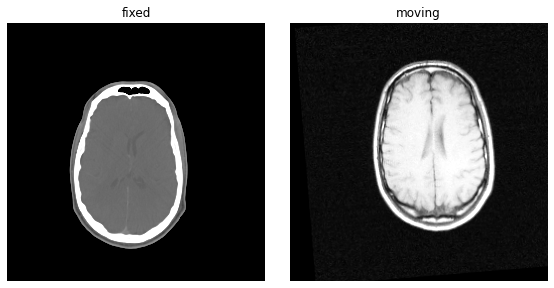

In [15]:

fixed_image = sitk.ReadImage('/content/training_001_ct.mha', sitk.sitkFloat64)
moving_image = sitk.ReadImage('/content/training_001_mr_T1.mha', sitk.sitkFloat64)


ct_window_level = [835, 162]
mr_window_level = [1036, 520]

MultiImageDisplay(
    image_list=[fixed_image, moving_image],
    title_list=["fixed", "moving"],
    figure_size=(8, 4),
    window_level_list=[ct_window_level, mr_window_level],
);


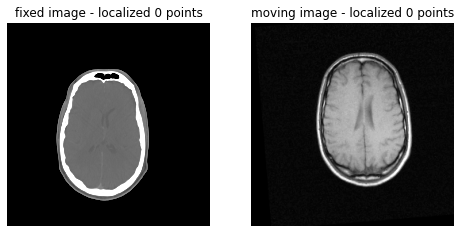

In [16]:
initial_transform = sitk.CenteredTransformInitializer(
    fixed_image,
    moving_image,
    sitk.Euler3DTransform(),
    sitk.CenteredTransformInitializerFilter.GEOMETRY,
)

RegistrationPointDataAquisition(
    fixed_image,
    moving_image,
    figure_size=(8, 4),
    known_transformation=initial_transform,
    fixed_window_level=ct_window_level,
    moving_window_level=mr_window_level,
);

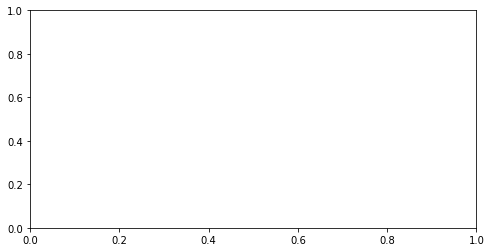

In [17]:
registration_method = sitk.ImageRegistrationMethod()

# Similarity metric settings.
registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
registration_method.SetMetricSamplingPercentage(0.01)

registration_method.SetInterpolator(sitk.sitkLinear)

# Optimizer settings.
registration_method.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=100, convergenceMinimumValue=1e-6, convergenceWindowSize=10)
registration_method.SetOptimizerScalesFromPhysicalShift()

# Setup for the multi-resolution framework.            
registration_method.SetShrinkFactorsPerLevel(shrinkFactors = [4,2,1])
registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[2,1,0])
registration_method.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()

# Don't optimize in-place, we would possibly like to run this cell multiple times.
registration_method.SetInitialTransform(initial_transform, inPlace=False)

# Connect all of the observers so that we can perform plotting during registration.
registration_method.AddCommand(sitk.sitkStartEvent, start_plot)
registration_method.AddCommand(sitk.sitkEndEvent, end_plot)
registration_method.AddCommand(sitk.sitkMultiResolutionIterationEvent, update_multires_iterations) 
registration_method.AddCommand(sitk.sitkIterationEvent, lambda: plot_values(registration_method))

final_transform = registration_method.Execute(sitk.Cast(fixed_image, sitk.sitkFloat32), 
                                               sitk.Cast(moving_image, sitk.sitkFloat32))